In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8755 - accuracy: 0.3083 - val_loss: 1.5363 - val_accuracy: 0.4386
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5688 - accuracy: 0.4263 - val_loss: 1.3990 - val_accuracy: 0.4889
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4534 - accuracy: 0.4741 - val_loss: 1.2816 - val_accuracy: 0.5447
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3763 - accuracy: 0.5070 - val_loss: 1.2509 - val_accuracy: 0.5532
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3127 - accuracy: 0.5320 - val_loss: 1.2219 - val_accuracy: 0.5779
Epoch 6/10
1563/156

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0409 - accuracy: 0.6388
Test loss: 1.040901780128479
Test accuracy: 0.6388000249862671


In [ ]:
## simple dense NN with 1 layers of 512 relu

epochs = 10

modelDense0 = Sequential()

modelDense0.add(Flatten())
modelDense0.add(Dense(512))
modelDense0.add(Activation('relu'))
modelDense0.add(Dropout(0.5))
modelDense0.add(Dense(num_classes))
modelDense0.add(Activation('softmax'))

modelDense0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
Dense0 = modelDense0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0235 - accuracy: 0.2668 - val_loss: 1.8256 - val_accuracy: 0.3588
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8901 - accuracy: 0.3213 - val_loss: 1.7419 - val_accuracy: 0.3982
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8403 - accuracy: 0.3404 - val_loss: 1.6913 - val_accuracy: 0.4087
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8093 - accuracy: 0.3515 - val_loss: 1.6537 - val_accuracy: 0.4123
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7890 - accuracy: 0.3619 - val_loss: 1.6228 - val_accuracy: 0.4424
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7761 - accuracy: 0.3669 - val_loss: 1.6095 - val_accuracy: 0.4362
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7539 - accuracy: 0.3749 - val_loss: 1.5923 -

In [ ]:
## simple dense NN with 0 layers of 512 relu

epochs = 10

modelDense1 = Sequential()

modelDense1.add(Flatten())
modelDense1.add(Dense(10))
modelDense1.add(Dropout(0.5))
modelDense1.add(Activation('softmax'))

modelDense1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Dense1 = modelDense1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.1863 - accuracy: 0.2044 - val_loss: 2.0113 - val_accuracy: 0.3043
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.1280 - accuracy: 0.2350 - val_loss: 1.9628 - val_accuracy: 0.3167
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.1123 - accuracy: 0.2446 - val_loss: 1.9370 - val_accuracy: 0.3472
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.1001 - accuracy: 0.2493 - val_loss: 1.9214 - val_accuracy: 0.3478
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0972 - accuracy: 0.2508 - val_loss: 1.9270 - val_accuracy: 0.3331
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0941 - accuracy: 0.2515 - val_loss: 1.9098 - val_accuracy: 0.3567
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0912 - accuracy: 0.2548 - val_loss: 1.8999 -

In [ ]:
## simple dense NN with 2 layers of 512 relu

epochs = 10

modelDense2 = Sequential()

modelDense2.add(Flatten())
modelDense2.add(Dense(512))
modelDense2.add(Activation('relu'))
modelDense2.add(Dropout(0.5))
modelDense2.add(Dense(512))
modelDense2.add(Activation('relu'))
modelDense2.add(Dropout(0.5))
modelDense2.add(Dense(num_classes))
modelDense2.add(Activation('softmax'))

modelDense2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Dense2 = modelDense2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 2.0964 - accuracy: 0.2261 - val_loss: 1.8858 - val_accuracy: 0.3401
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9558 - accuracy: 0.2889 - val_loss: 1.7923 - val_accuracy: 0.3685
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9097 - accuracy: 0.3100 - val_loss: 1.7377 - val_accuracy: 0.3846
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8819 - accuracy: 0.3202 - val_loss: 1.7333 - val_accuracy: 0.3791
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.8625 - accuracy: 0.3297 - val_loss: 1.6778 - val_accuracy: 0.4153
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.8429 - accuracy: 0.3416 - val_loss: 1.6515 - val_accuracy: 0.4221
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.8362 - accuracy: 0.3453 - val_loss: 1.6457 -

In [ ]:
## simple dense NN with 3 layers of 512 relu

epochs = 10

modelDense3 = Sequential()

modelDense3.add(Flatten())
modelDense3.add(Dense(512))
modelDense3.add(Activation('relu'))
modelDense3.add(Dropout(0.5))
modelDense3.add(Dense(512))
modelDense3.add(Activation('relu'))
modelDense3.add(Dropout(0.5))
modelDense3.add(Dense(512))
modelDense3.add(Activation('relu'))
modelDense3.add(Dropout(0.5))
modelDense3.add(Dense(num_classes))
modelDense3.add(Activation('softmax'))

modelDense3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Dense3 = modelDense3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 2.1578 - accuracy: 0.1865 - val_loss: 1.9377 - val_accuracy: 0.2916
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0023 - accuracy: 0.2602 - val_loss: 1.8384 - val_accuracy: 0.3510
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.9519 - accuracy: 0.2865 - val_loss: 1.8021 - val_accuracy: 0.3587
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9247 - accuracy: 0.2971 - val_loss: 1.7642 - val_accuracy: 0.3767
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.9037 - accuracy: 0.3085 - val_loss: 1.7314 - val_accuracy: 0.3888
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8859 - accuracy: 0.3176 - val_loss: 1.7287 - val_accuracy: 0.3907
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8709 - accuracy: 0.3200 - val_loss: 1.7080 -

In [ ]:
## simple dense NN with 4 layers of 512 relu

epochs = 10

modelDense4 = Sequential()

modelDense4.add(Flatten())
modelDense4.add(Dense(512))
modelDense4.add(Activation('relu'))
modelDense4.add(Dropout(0.5))
modelDense4.add(Dense(512))
modelDense4.add(Activation('relu'))
modelDense4.add(Dropout(0.5))
modelDense4.add(Dense(512))
modelDense4.add(Activation('relu'))
modelDense4.add(Dropout(0.5))
modelDense4.add(Dense(num_classes))
modelDense4.add(Activation('softmax'))

modelDense4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Dense4 = modelDense4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 2.1618 - accuracy: 0.1864 - val_loss: 1.9328 - val_accuracy: 0.3070
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 2.0069 - accuracy: 0.2569 - val_loss: 1.8402 - val_accuracy: 0.3468
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9554 - accuracy: 0.2835 - val_loss: 1.8106 - val_accuracy: 0.3430
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9313 - accuracy: 0.2949 - val_loss: 1.7951 - val_accuracy: 0.3596
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9082 - accuracy: 0.3068 - val_loss: 1.7682 - val_accuracy: 0.3735
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8860 - accuracy: 0.3177 - val_loss: 1.7407 - val_accuracy: 0.3877
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8734 - accuracy: 0.3221 - val_loss: 1.7461 -

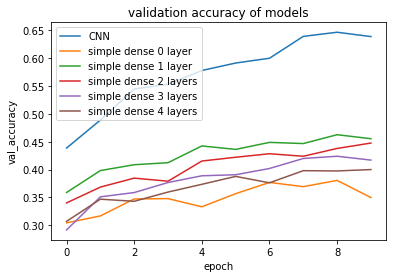

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(Dense1.history['val_accuracy'])
plt.plot(Dense0.history['val_accuracy'])
plt.plot(Dense2.history['val_accuracy'])
plt.plot(Dense3.history['val_accuracy'])
plt.plot(Dense4.history['val_accuracy'])
plt.title('validation accuracy of models')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'simple dense 0 layer','simple dense 1 layer'
            ,'simple dense 2 layers','simple dense 3 layers',
           'simple dense 4 layers'], loc='upper left')
plt.show()

As is shown in the graph above, the validation accuracy of CNN is apparently higher than others. That is because CNN reduces number of connections, shares weights on the edges, and its max pooling further reduces the complexity. In addition, for the validation accuracies of simple dense neural networks with 1-4 hidden layers, the accuracy  decreases while the amount of layers increases. When there are 0 layer, the accuracy is lowest. We can see that for the simple dense neural networks, 1 layer is the best. That is because, 0 layer is underfitting, while 2-4 layers are overfitting.

In [ ]:
## problem (b)

modelSig = Sequential()
modelSig.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(32, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Conv2D(64, (3, 3), padding='same'))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(64, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Flatten())
modelSig.add(Dense(512))
modelSig.add(Activation('sigmoid'))
modelSig.add(Dropout(0.5))
modelSig.add(Dense(num_classes))
modelSig.add(Activation('softmax'))

modelSig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Sig = modelSig.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.3331 - accuracy: 0.1027 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3074 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3060 - accuracy: 0.1026 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3057 - accuracy: 0.1004 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3054 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.3049 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3044 - accuracy: 0.1014 - val_loss: 2.3027 -

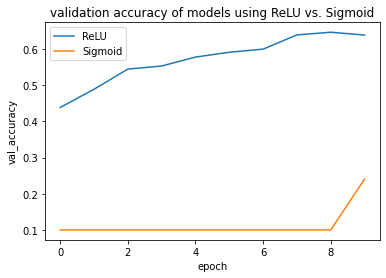

In [ ]:
# summarize history for accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(Sig.history['val_accuracy'])
plt.title('validation accuracy of models using ReLU vs. Sigmoid')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='upper left')
plt.show()

As shown in the graph above, ReLU is significantly more accurate than Sigmoid because it vanishes gradient problem. Sigmoid function can easy lead to vanishing gradient. It press values between 0-1. Every time is passed through sigmoid function, the value will attenuate. However, ReLU can solve this problem about gradient. And it is fast to compute.

In [ ]:
## problem (c)

# with Drop out and augmentation
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    DropandAug = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    DropandAug = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8563 - accuracy: 0.3184 - val_loss: 1.5291 - val_accuracy: 0.4528
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5786 - accuracy: 0.4271 - val_loss: 1.3884 - val_accuracy: 0.4982
Epoch 3/50
1563/1563 [==============================] - 30s 20ms/step - loss: 1.4605 - accuracy: 0.4735 - val_loss: 1.3513 - val_accuracy: 0.5259
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3822 - accuracy: 0.5042 - val_loss: 1.2433 - val_accuracy: 0.5560
Epoch 5/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3182 - accuracy: 0.5291 - val_loss: 1.2023 - val_accuracy: 0.5699
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2632 - accuracy: 0.5499 - val_loss: 1.1298 - val_accuracy: 0.6011
Epoch 7/50
1563/

In [ ]:
# no Dropout but augmentation
data_augmentation = True

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    AugNoDrop = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    AugNoDrop= model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7102 - accuracy: 0.3797 - val_loss: 1.4249 - val_accuracy: 0.4933
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4523 - accuracy: 0.4802 - val_loss: 1.3380 - val_accuracy: 0.5252
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3355 - accuracy: 0.5266 - val_loss: 1.1637 - val_accuracy: 0.5928
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2414 - accuracy: 0.5619 - val_loss: 1.1146 - val_accuracy: 0.6153
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1666 - accuracy: 0.5901 - val_loss: 1.0346 - val_accuracy: 0.6392
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1041 - accuracy: 0.6125 - val_loss: 1.0066 - val_accuracy: 0.6509
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0502 - ac

In [ ]:
# no augmentation but Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

data_augmentation = False

if not data_augmentation:
    print('Not using data augmentation.')
    NoAug = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoAug = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8261 - accuracy: 0.3298 - val_loss: 1.5315 - val_accuracy: 0.4438
Epoch 2/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5014 - accuracy: 0.4539 - val_loss: 1.3558 - val_accuracy: 0.5134
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3801 - accuracy: 0.5064 - val_loss: 1.3169 - val_accuracy: 0.5346
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2892 - accuracy: 0.5410 - val_loss: 1.1945 - val_accuracy: 0.5824
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2092 - accuracy: 0.5695 - val_loss: 1.1096 - val_accuracy: 0.6115
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1446 - accuracy: 0.5972 - val_loss: 1.0740 - val_accuracy: 0.6282
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0913 - accuracy: 0.6163 - val

In [ ]:
# no augmentation no Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

data_augmentation = False

if not data_augmentation:
    print('Not using data augmentation.')
    NoAugandDrop = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoAugandDrop = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6820 - accuracy: 0.3951 - val_loss: 1.4730 - val_accuracy: 0.4695
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4027 - accuracy: 0.5013 - val_loss: 1.3599 - val_accuracy: 0.5192
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2605 - accuracy: 0.5564 - val_loss: 1.2125 - val_accuracy: 0.5691
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1473 - accuracy: 0.5983 - val_loss: 1.1386 - val_accuracy: 0.5923
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0551 - accuracy: 0.6304 - val_loss: 1.0396 - val_accuracy: 0.6364
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9787 - accuracy: 0.6603 - val_loss: 1.0727 - val_accuracy: 0.6214
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9174 - accuracy: 0.6802 - val

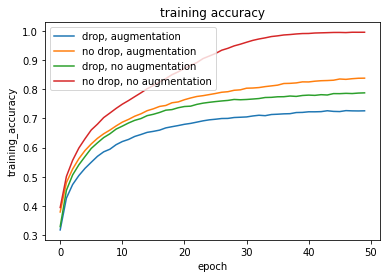

In [ ]:
# summarize history for training accuracy
plt.plot(DropandAug.history['accuracy'])
plt.plot(AugNoDrop.history['accuracy'])
plt.plot(NoAug.history['accuracy'])
plt.plot(NoAugandDrop.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training_accuracy')
plt.xlabel('epoch')
plt.legend(['drop, augmentation', 'no drop, augmentation',
           'drop, no augmentation','no drop, no augmentation'], loc='upper left')
plt.show()

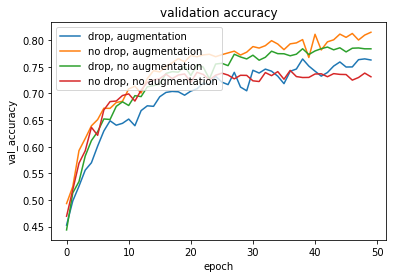

In [ ]:
# summarize history for test accuracy
plt.plot(DropandAug.history['val_accuracy'])
plt.plot(AugNoDrop.history['val_accuracy'])
plt.plot(NoAug.history['val_accuracy'])
plt.plot(NoAugandDrop.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['drop, augmentation', 'no drop, augmentation',
           'drop, no augmentation','no drop, no augmentation'], loc='upper left')
plt.show()

For training accuracies, the accuracy of 'drop' is always higher than the accuracy of 'no drop', and the accuracy of 'augmentation' is always higher than the accuracy of 'no augmentation'. However, for test accuracies, although this rule is true when the epoch is small (like lower than 10), it is not always true, especially when the epoch is larger. As shown in the graph, when the epoch is large, the accuracy 'no drop, no augmentation' is the lowest. In other 3 curves, we can still observe the rule in training accuracies. The problem in the curve 'no drop, no augmentation' is due to overfitting. As the number of epochs reaches 100, this problem will still exist. The sequence of those 4 curves will not change when the epoch increases.